Elaborado por:
* Jose Guillermo Gordillo Lopez - 23003971
* René Ronaldo Godoy Mejía - 23005126
* Marvin Fernando Carrillo Robles - 14003303

# 1. Informacion General del Problema

Desarrollar un modelo de clasificación de imágenes basado en redes neuronales convolucionales (CNNs) capaz de distinguir entre diferentes tipos de frutas y verduras, utilizando un conjunto de datos inicial centrado en imágenes. El modelo deberá ser robusto ante variaciones en tamaño, rotación y condiciones de iluminación de las imágenes.

Se seleccionaron 3 frutas (Apple, Banana, Mango) y 3 verduras (Bellpepper, Carrot, Tomato)

Utilizando el siguiente Dataset de imagenes: https://drive.google.com/file/d/1Pqj5DE3l2DtWz5mwHp7H_wVAb8GzhyOy/view?usp=sharing

**Data:**

    Train Set: 400 imagenes por categoria.
    Test Set: 200 imagenes por categoria.
    Validation Set: 20 imagenes por categoria.

Las cuales estan organizadas por subcarpetas entre las frutas y verduras



# 2. Analisis de la data

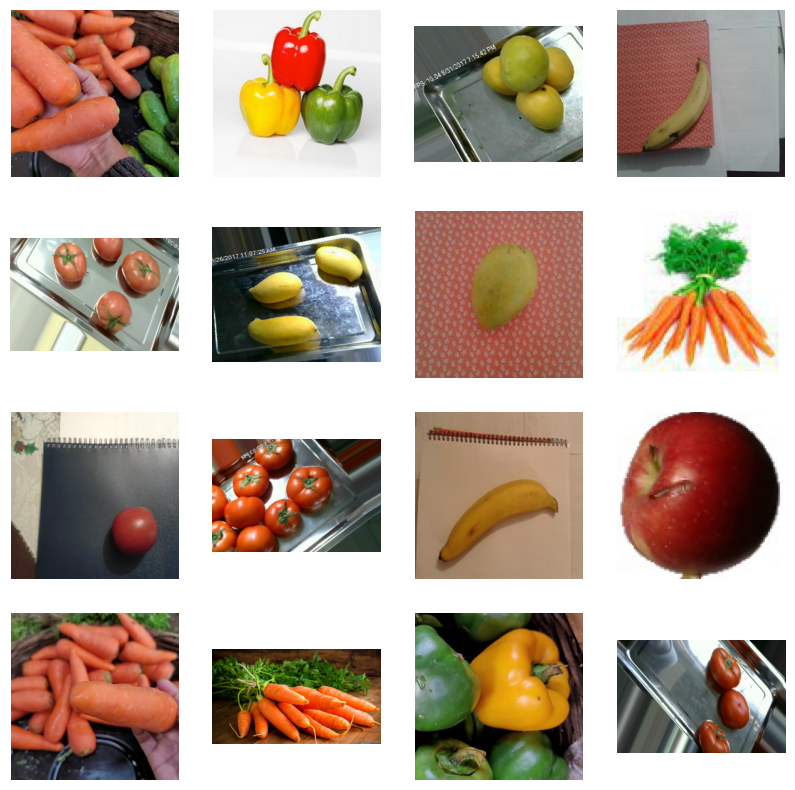

In [42]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


base_path = "imagenes/"

# Defino el path de mi train_set
vizor_dir = base_path+"train_set"

# Obtener una lista de todas las subcarpetas (Clases)
clases = os.listdir(vizor_dir)

# Inicializamos una lista vacia para guardar las rutas 
image_paths = []

# For para obtener unas cuantas imagenes para tener una visualizacion de lo que hay 
for cls in clases:
    class_dir = os.path.join(vizor_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Se seleccionan al azar 16 imagenes
random_images = random.sample(image_paths, 16)

# se configuran en plot de 4x4
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Se muestran en el subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')   


plt.show()

    Se puede observar que las imagenes tiene diferentes tamaños, por lo que va a ser necesario estandarizar su tamaño 

## **Data de Entrenamiento**

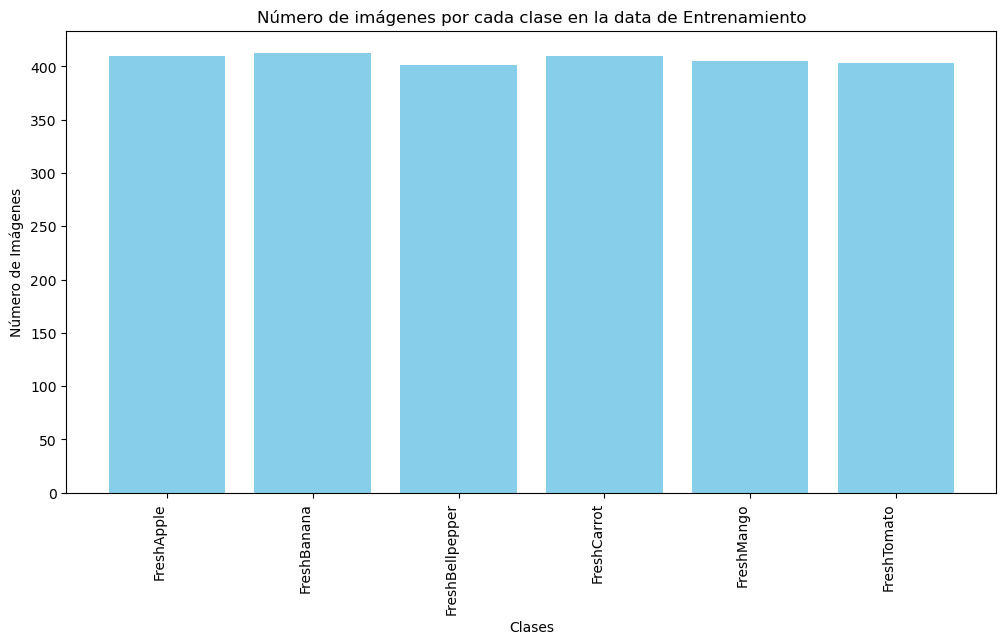

In [45]:
# Se obtiene la lista de todos los directorios
clases = os.listdir(vizor_dir)

# Cuenta las imagenes en cada subcarpeta
image_count = {cls: len(os.listdir(os.path.join(vizor_dir, cls))) for cls in clases}

# Crea un plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Número de imágenes por cada clase en la data de Entrenamiento')
plt.xticks(rotation=90, ha='right')  # Rota la clase para mejor lectura
plt.show()

    Se puede observar que la cantidad de datos por cada clase es similar

## **Data de Testeo**

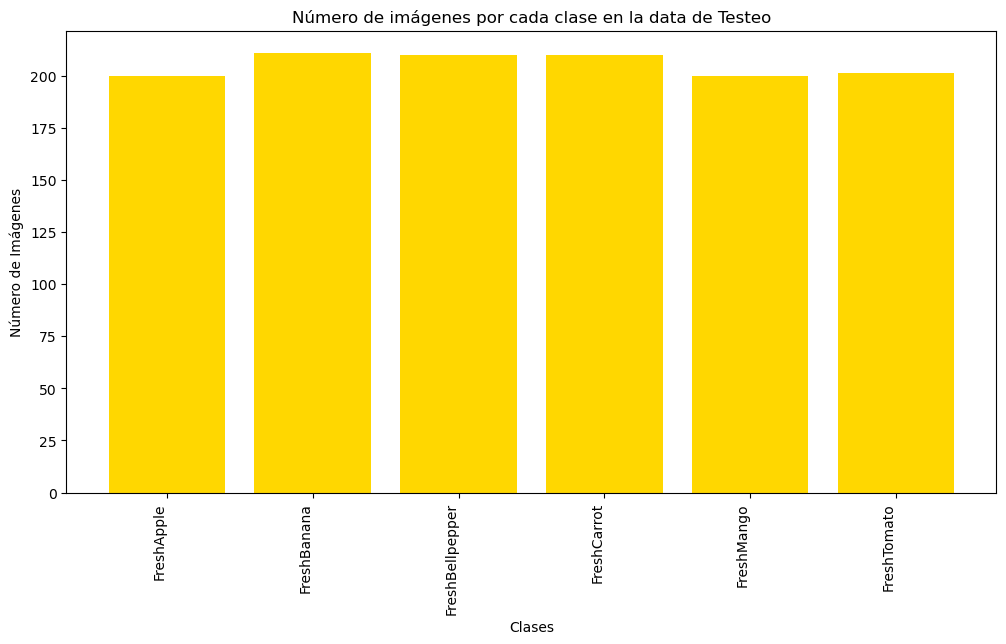

In [55]:
# Defino el path de mi test_set
vizor_dir = base_path+"test_set"

# Se obtiene la lista de todos los directorios
clases = os.listdir(vizor_dir)

# Cuenta las imagenes en cada subcarpeta
image_count = {cls: len(os.listdir(os.path.join(vizor_dir, cls))) for cls in clases}


plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='gold')
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Número de imágenes por cada clase en la data de Testeo')
plt.xticks(rotation=90, ha='right')  # Rota la clase para mejor lectura
plt.show()

    Sigue teniendo una consistencia en las cantidad segun cada clase

## **Data de Validacion**

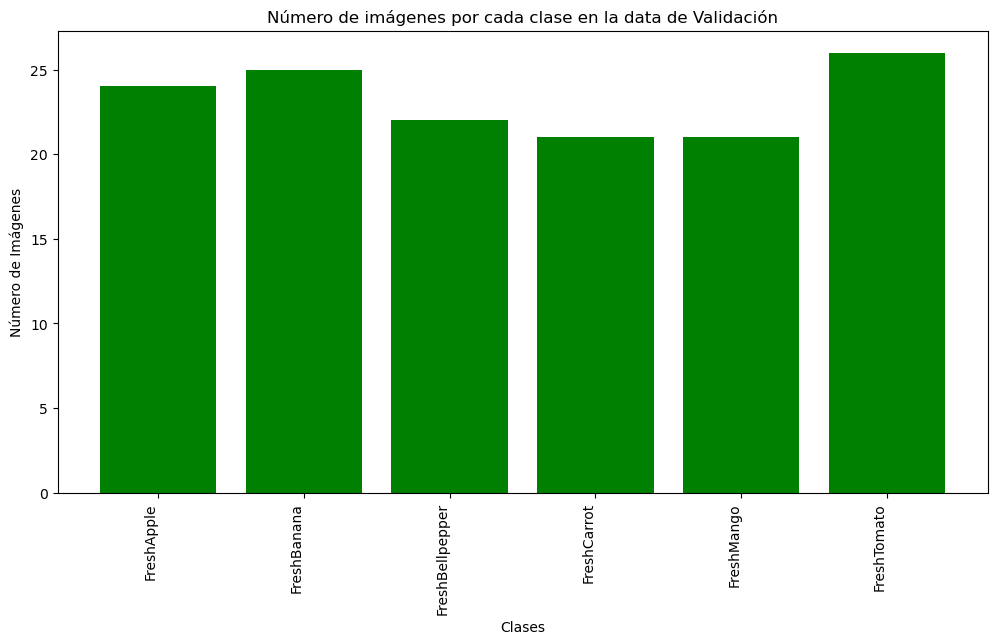

In [56]:
# Defino el path de mi validation_set
vizor_dir = base_path+"validation_set"

# Obtiene el listado de carpetas
clases = os.listdir(vizor_dir)

# Cuenta el numero de imagenes en cada subcarpeta
image_count = {cls: len(os.listdir(os.path.join(vizor_dir, cls))) for cls in clases}
 
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='green')
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Número de imágenes por cada clase en la data de Validación')
plt.xticks(rotation=90, ha='right')  # Rota la clase para mejor lectura
plt.show()

    Esta data se recopilo manualmente de internet para luego tener una validacion sobre los modelos.

## **3. Generacion de la Data**

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

### 3.1 Data Augmentation y Input Data Flow para Train 

In [80]:
# Cambio de la ruta para produccion
base_path = base_path + "produccion/"
base_path

'imagenes/produccion/'

In [81]:

data_train_path = base_path + "train_set/" # Path a datos de entrenamiento
# Mecanismo para data augmentation para generar variaciones de imagenes originales

train_aumentation_process= ImageDataGenerator(
    rescale = 1/255.,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.5
)

train_data_flow = train_aumentation_process.flow_from_directory(
    directory = data_train_path,
    target_size = (128,128),
    batch_size = 32, # 10% de la data de train
    class_mode ="categorical"
)

Found 2442 images belonging to 6 classes.


### Data Augmentation y Input Data Flow para Test 

In [82]:
data_test_path = base_path + "test_set/" # Path a datos de entrenamiento
# Mecanismo para data augmentation para generar variaciones de imagenes originales

test_aumentation_process= ImageDataGenerator(
    rescale = 1/255.    
)

test_data_flow = test_aumentation_process.flow_from_directory(
    directory = data_test_path,
    target_size = (128,128),
    batch_size = 32, # 10% de la data de train
    class_mode ="categorical"
)

Found 1230 images belonging to 6 classes.


# **4. Definimos Red Neouronal Convolucional**

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten


# 4.1.1 Arquitectura de Red Modelo 1

In [87]:
cnn_v1 = Sequential()

# Fase de Preprocesamiento --------------
cnn_v1.add(Conv2D(input_shape = (128,128,3), filters=64,kernel_size=(3,3),activation="relu"))

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten())

cnn_v1.add(Dense(units=128, activation="relu"))

cnn_v1.add(Dense(units=6, activation="softmax"))



In [88]:
cnn_v1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [90]:
# Muestra el sumario del Modelo
cnn_v1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    32,514,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,550,228 (372.12 MB)

 Trainable params: 32,516,742 (124.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,033,486 (248.08 MB)

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

In [97]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    base_path+'/best_model_cnn_v1.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = cnn_v1.fit(
    train_data_flow,
    steps_per_epoch=20,
    epochs=10,
    validation_steps=100, 
    validation_data=test_data_flow,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history_cnn_v1.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.65041, saving model to imagenes/produccion//best_model_cnn_v1.keras


c:\Users\jggl_\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 - 13s - 639ms/step - accuracy: 0.8250 - loss: 0.5316 - val_accuracy: 0.6504 - val_loss: 0.8706
Epoch 2/10

Epoch 2: val_accuracy improved from 0.65041 to 0.69837, saving model to imagenes/produccion//best_model_cnn_v1.keras
20/20 - 12s - 606ms/step - accuracy: 0.8625 - loss: 0.4340 - val_accuracy: 0.6984 - val_loss: 0.8114
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.69837
20/20 - 7s - 370ms/step - accuracy: 0.8531 - loss: 0.4488 - val_accuracy: 0.6537 - val_loss: 1.0080
Epoch 4/10

Epoch 4: val_accuracy improved from 0.69837 to 0.71057, saving model to imagenes/produccion//best_model_cnn_v1.keras
20/20 - 10s - 508ms/step - accuracy: 0.8364 - loss: 0.4844 - val_accuracy: 0.7106 - val_loss: 0.7838
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.71057
20/20 - 8s - 407ms/step - accuracy: 0.8547 - loss: 0.4183 - val_accuracy: 0.6935 - val_loss: 0.7647
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.71057
20/20 - 8s - 379ms/step - accuracy: 0.8285 - loss:

## **4.1.2 Visualizacion del Modelo**

In [98]:
#!pip install visualkeras

  Obtaining dependency information for visualkeras from https://files.pythonhosted.org/packages/1c/af/5ba28f72a0fc0ea2515df354e810c86500ceb16f651238078e9de667bf98/visualkeras-0.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/b6/d3/d4ea2d31748a2c691682b8f7e596ba53ff4c4d6e525c548623b2ef9c53de/aggdraw-1.3.19-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/44.9 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.9 kB ? eta -:--:--
   ---------------------------------------- 44.9/44.9 kB 550.0 kB/s eta 0:00:00


c:\Users\jggl_\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\jggl_\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


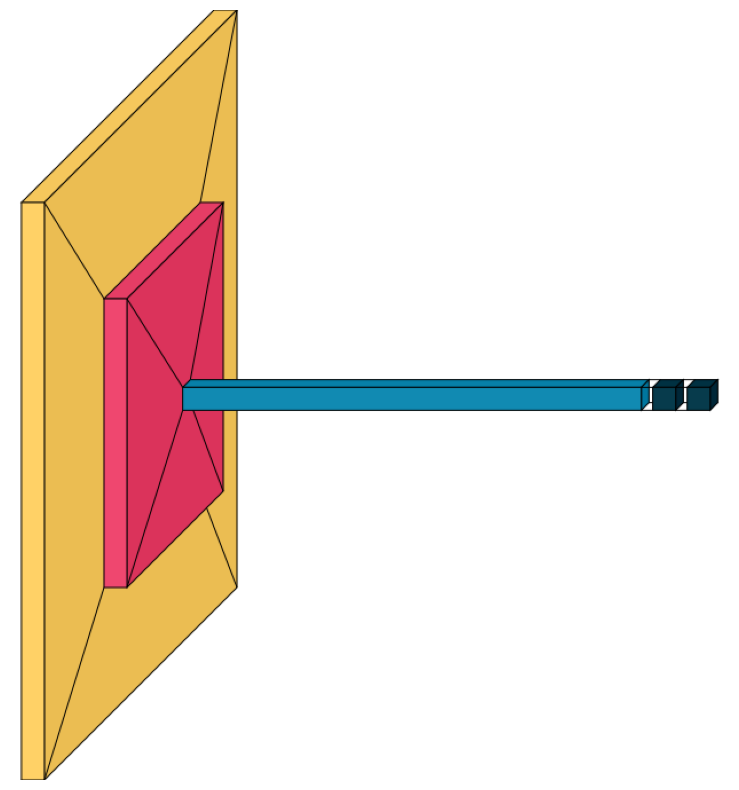

In [101]:
from tensorflow.keras.models import load_model
import visualkeras
from PIL import Image

# Load your pre-trained model
model_path = base_path+'best_model_cnn_v1.keras'
model = load_model(model_path)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path = base_path+'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

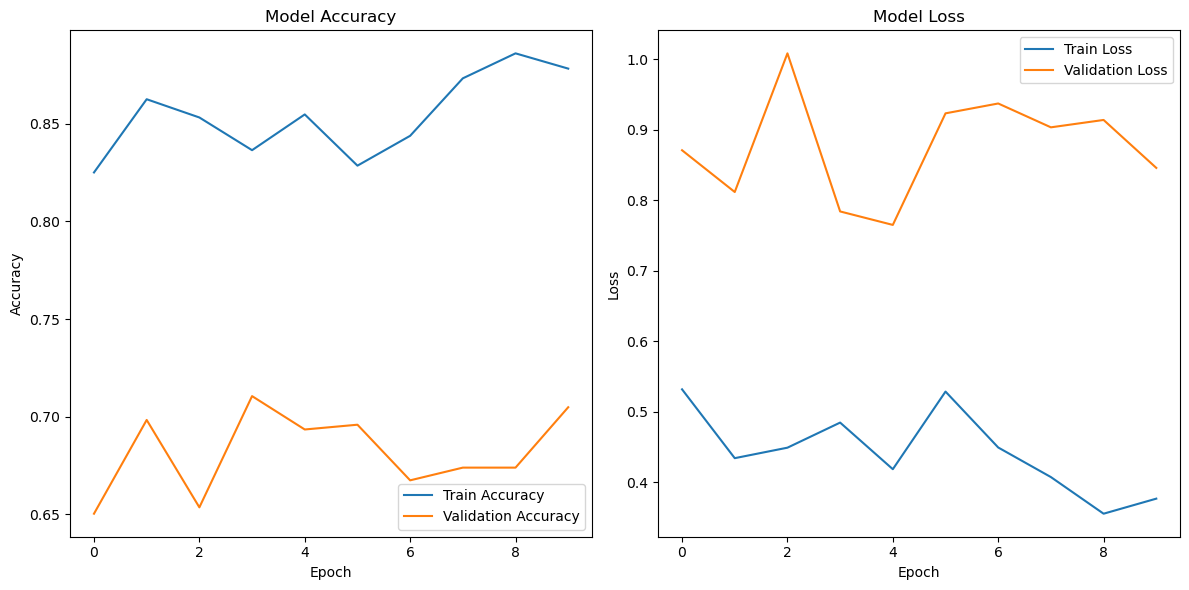

In [102]:
import matplotlib.pyplot as plt


# Load the training history
with open('training_history_cnn_v1.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

podemos ver que el modelo no es muy exacto en su metrica

In [116]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

In [117]:
from sklearn.metrics import classification_report 
# Assuming `predictions` and `labels` have already been populated
# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

     FreshApple       0.92      0.69      0.79       200
    FreshBanana       0.50      0.55      0.52       210
FreshBellpepper       0.86      0.85      0.85       210
    FreshCarrot       0.84      0.83      0.84       209
     FreshMango       0.58      0.53      0.55       200
    FreshTomato       0.64      0.81      0.72       201

       accuracy                           0.71      1230
      macro avg       0.72      0.71      0.71      1230
   weighted avg       0.72      0.71      0.71      1230



podemos observar que este modelo no es muy preciso para predecir las bananas, mango, tomate

# 4.1.2 Arquitectura de Red Modelo 2

In [118]:
cnn_v2 = Sequential()

cnn_v2.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_v2.add(MaxPool2D(pool_size=(2,2)))

cnn_v2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_v2.add(MaxPool2D(pool_size=(2,2)))

cnn_v2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_v2.add(MaxPool2D(pool_size=(2,2)))

cnn_v2.add(Flatten())

cnn_v2.add(Dense(128, activation="relu")) 

cnn_v2.add(Dense(units=6, activation="softmax"))

# Compile the model
cnn_v2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
cnn_v2.summary()

c:\Users\jggl_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,323,014 (8.86 MB)

 Trainable params: 2,323,014 (8.86 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    base_path+'/best_model_cnn_v2.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = cnn_v2.fit(
    train_data_flow,
    steps_per_epoch=20,
    epochs=100,
    validation_steps=100, 
    validation_data=test_data_flow,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history_cnn_v2.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.37805, saving model to imagenes/produccion//best_model_cnn_v2.keras


c:\Users\jggl_\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 - 18s - 908ms/step - accuracy: 0.2344 - loss: 1.7405 - val_accuracy: 0.3780 - val_loss: 1.6288
Epoch 2/100

Epoch 2: val_accuracy improved from 0.37805 to 0.39106, saving model to imagenes/produccion//best_model_cnn_v2.keras
20/20 - 17s - 851ms/step - accuracy: 0.2875 - loss: 1.6267 - val_accuracy: 0.3911 - val_loss: 1.5199
Epoch 3/100

Epoch 3: val_accuracy improved from 0.39106 to 0.41870, saving model to imagenes/produccion//best_model_cnn_v2.keras
20/20 - 19s - 927ms/step - accuracy: 0.4250 - loss: 1.4308 - val_accuracy: 0.4187 - val_loss: 1.3982
Epoch 4/100

Epoch 4: val_accuracy improved from 0.41870 to 0.42520, saving model to imagenes/produccion//best_model_cnn_v2.keras
20/20 - 17s - 849ms/step - accuracy: 0.4904 - loss: 1.3686 - val_accuracy: 0.4252 - val_loss: 1.4441
Epoch 5/100

Epoch 5: val_accuracy improved from 0.42520 to 0.54390, saving model to imagenes/produccion//best_model_cnn_v2.keras
20/20 - 19s - 958ms/step - accuracy: 0.5406 - loss: 1.2101 - val_accuracy: 0

c:\Users\jggl_\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


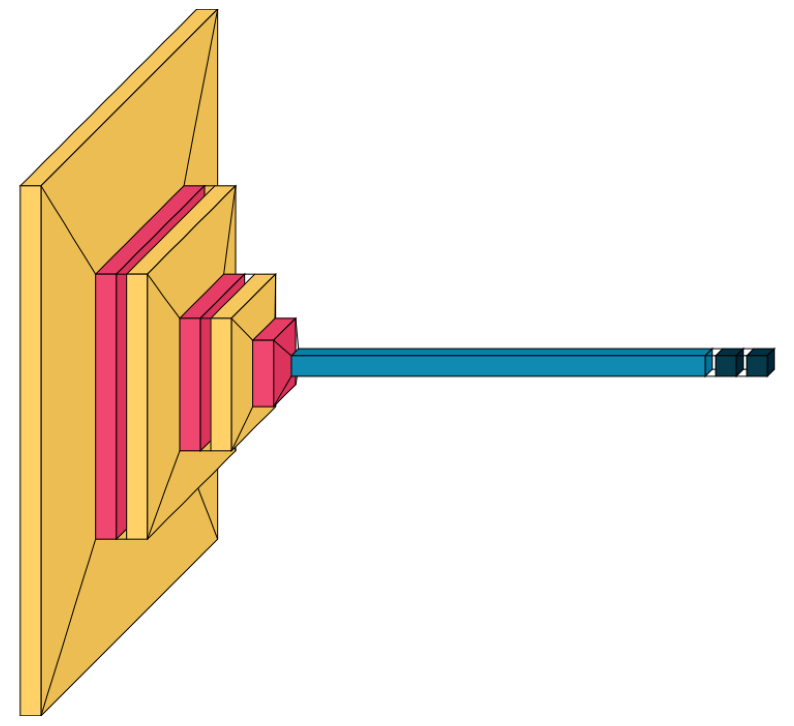

In [128]:
# Load your pre-trained model
model_path2 = base_path+'best_model_cnn_v2.keras'
model2 = load_model(model_path2)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path2 = base_path+'model_visualization2.png'
visualkeras.layered_view(model2).save(visualization_path2)

# Display the image using matplotlib
img = Image.open(visualization_path2)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

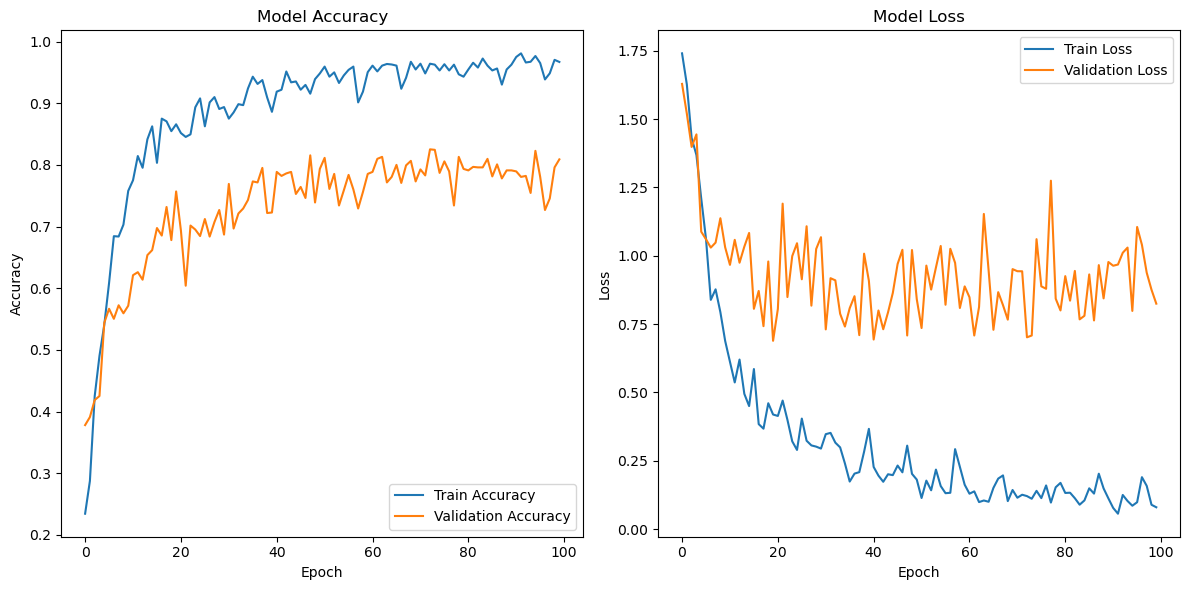

In [129]:

# Load the training history
with open('training_history_cnn_v2.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [130]:

# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model2.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [131]:
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

     FreshApple       0.83      0.67      0.74       200
    FreshBanana       0.65      0.91      0.76       210
FreshBellpepper       0.94      0.90      0.92       210
    FreshCarrot       0.90      0.95      0.93       209
     FreshMango       0.78      0.64      0.70       200
    FreshTomato       0.91      0.87      0.89       201

       accuracy                           0.83      1230
      macro avg       0.84      0.82      0.82      1230
   weighted avg       0.84      0.83      0.82      1230



# 4.1.3 Arquitectura de Red Modelo 3

In [135]:
cnn_v3 = Sequential()

cnn_v3.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_v3.add(MaxPool2D(pool_size=(2,2)))

cnn_v3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_v3.add(MaxPool2D(pool_size=(2,2)))

cnn_v3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_v3.add(MaxPool2D(pool_size=(2,2)))

cnn_v3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_v3.add(MaxPool2D(pool_size=(2,2)))

cnn_v3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_v3.add(MaxPool2D(pool_size=(2,2)))

cnn_v3.add(Flatten())

cnn_v3.add(Dense(512, activation="relu")) 
cnn_v3.add(Dense(64, activation="relu"))  
cnn_v3.add(Dense(units=6, activation="softmax"))

# Compile the model
cnn_v3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
cnn_v3.summary()

c:\Users\jggl_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631,590 (2.41 MB)

 Trainable params: 631,590 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    base_path+'/best_model_cnn_v3.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = cnn_v3.fit(
    train_data_flow,
    steps_per_epoch=20,
    epochs=150,
    validation_steps=100, 
    validation_data=test_data_flow,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history_cnn_v3.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/150

Epoch 1: val_accuracy improved from -inf to 0.16992, saving model to imagenes/produccion//best_model_cnn_v3.keras
20/20 - 20s - 992ms/step - accuracy: 0.1594 - loss: 1.7989 - val_accuracy: 0.1699 - val_loss: 1.7864
Epoch 2/150


c:\Users\jggl_\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.16992 to 0.31951, saving model to imagenes/produccion//best_model_cnn_v3.keras
20/20 - 17s - 845ms/step - accuracy: 0.2233 - loss: 1.7498 - val_accuracy: 0.3195 - val_loss: 1.6521
Epoch 3/150

Epoch 3: val_accuracy improved from 0.31951 to 0.36260, saving model to imagenes/produccion//best_model_cnn_v3.keras
20/20 - 19s - 944ms/step - accuracy: 0.2906 - loss: 1.6569 - val_accuracy: 0.3626 - val_loss: 1.4472
Epoch 4/150

Epoch 4: val_accuracy did not improve from 0.36260
20/20 - 17s - 826ms/step - accuracy: 0.3309 - loss: 1.6236 - val_accuracy: 0.3049 - val_loss: 1.4999
Epoch 5/150

Epoch 5: val_accuracy did not improve from 0.36260
20/20 - 20s - 981ms/step - accuracy: 0.3187 - loss: 1.5241 - val_accuracy: 0.3577 - val_loss: 1.3931
Epoch 6/150

Epoch 6: val_accuracy improved from 0.36260 to 0.41138, saving model to imagenes/produccion//best_model_cnn_v3.keras
20/20 - 19s - 936ms/step - accuracy: 0.3414 - loss: 1.5043 - val_accuracy: 0.4114 - val_lo

c:\Users\jggl_\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


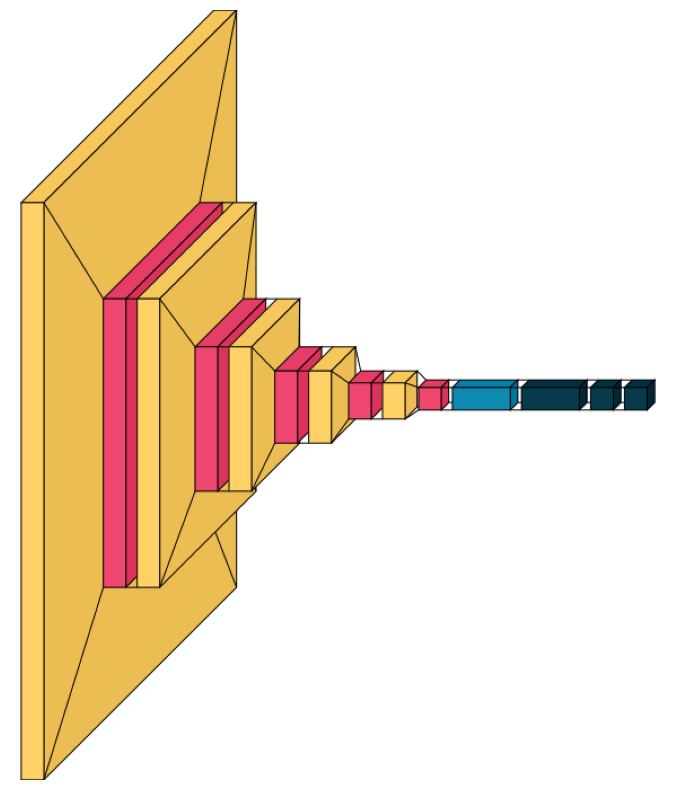

In [137]:
# Load your pre-trained model
model_path3 = base_path+'best_model_cnn_v3.keras'
model3 = load_model(model_path3)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path3 = base_path+'model_visualization3.png'
visualkeras.layered_view(model3).save(visualization_path3)

# Display the image using matplotlib
img = Image.open(visualization_path3)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

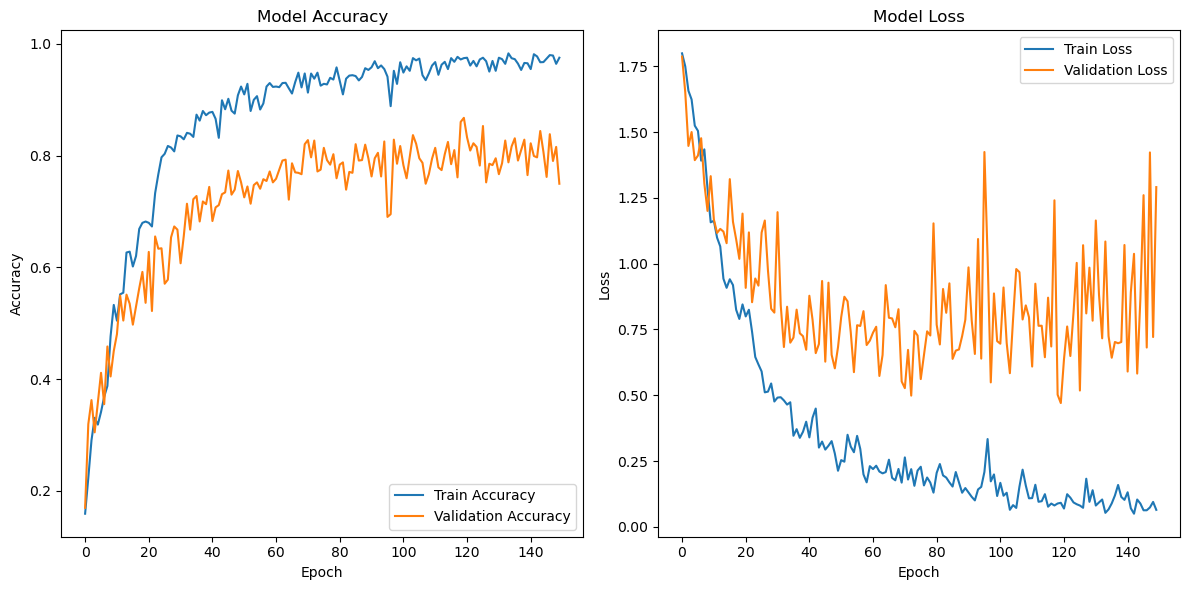

In [138]:
# Load the training history
with open('training_history_cnn_v3.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [139]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model3.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [140]:
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

     FreshApple       0.91      0.81      0.86       200
    FreshBanana       0.71      0.92      0.80       210
FreshBellpepper       0.93      0.83      0.88       210
    FreshCarrot       0.95      0.99      0.97       209
     FreshMango       0.97      0.73      0.84       200
    FreshTomato       0.82      0.92      0.86       201

       accuracy                           0.87      1230
      macro avg       0.88      0.87      0.87      1230
   weighted avg       0.88      0.87      0.87      1230



# 4.1.4 Arquitectura de Red Modelo 4

In [141]:
from tensorflow.keras.layers import BatchNormalization

In [143]:
cnn_v4 = Sequential()

cnn_v4.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPool2D(pool_size=(2,2)))

cnn_v4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPool2D(pool_size=(2,2)))

cnn_v4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPool2D(pool_size=(2,2)))

cnn_v4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPool2D(pool_size=(2,2)))

cnn_v4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_v4.add(BatchNormalization())
cnn_v4.add(MaxPool2D(pool_size=(2,2)))

cnn_v4.add(Flatten())

cnn_v4.add(Dense(512, activation="relu")) 
cnn_v4.add(BatchNormalization())
cnn_v4.add(Dense(128, activation="relu"))  
cnn_v4.add(BatchNormalization())
cnn_v4.add(Dense(units=6, activation="softmax")) 

# Compile the model
cnn_v4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
cnn_v4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 669,286 (2.55 MB)

 Trainable params: 667,046 (2.54 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [144]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    base_path+'/best_model_cnn_v4.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = cnn_v4.fit(
    train_data_flow,
    steps_per_epoch=20,
    epochs=150,
    validation_steps=100, 
    validation_data=test_data_flow,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history_cnn_v4.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/150

Epoch 1: val_accuracy improved from -inf to 0.20650, saving model to imagenes/produccion//best_model_cnn_v4.keras
20/20 - 35s - 2s/step - accuracy: 0.4919 - loss: 1.4661 - val_accuracy: 0.2065 - val_loss: 1.8123
Epoch 2/150


c:\Users\jggl_\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.20650
20/20 - 31s - 2s/step - accuracy: 0.6719 - loss: 0.8839 - val_accuracy: 0.2000 - val_loss: 2.3766
Epoch 3/150

Epoch 3: val_accuracy did not improve from 0.20650
20/20 - 32s - 2s/step - accuracy: 0.7906 - loss: 0.6043 - val_accuracy: 0.1667 - val_loss: 2.6489
Epoch 4/150

Epoch 4: val_accuracy did not improve from 0.20650
20/20 - 28s - 1s/step - accuracy: 0.8070 - loss: 0.5386 - val_accuracy: 0.1911 - val_loss: 3.5204
Epoch 5/150

Epoch 5: val_accuracy did not improve from 0.20650
20/20 - 33s - 2s/step - accuracy: 0.8438 - loss: 0.4345 - val_accuracy: 0.1707 - val_loss: 3.9745
Epoch 6/150

Epoch 6: val_accuracy did not improve from 0.20650
20/20 - 32s - 2s/step - accuracy: 0.8406 - loss: 0.4770 - val_accuracy: 0.1707 - val_loss: 4.7334
Epoch 7/150

Epoch 7: val_accuracy did not improve from 0.20650
20/20 - 32s - 2s/step - accuracy: 0.8786 - loss: 0.3815 - val_accuracy: 0.1707 - val_loss: 4.1390
Epoch 8/150

Epoch 8: val_accuracy did n

c:\Users\jggl_\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


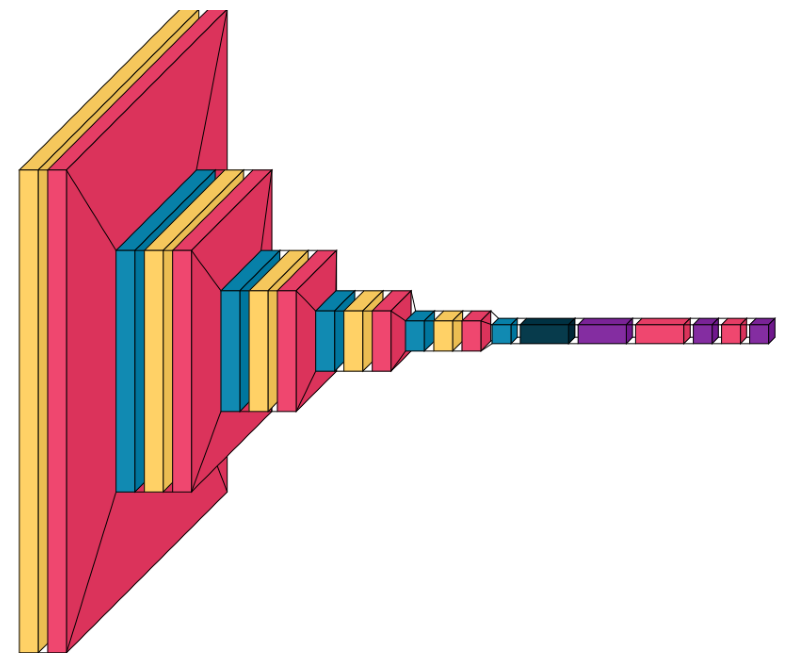

In [145]:
# Load your pre-trained model
model_path4 = base_path+'best_model_cnn_v4.keras'
model4 = load_model(model_path4)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
visualization_path4 = base_path+'model_visualization4.png'
visualkeras.layered_view(model4).save(visualization_path4)

# Display the image using matplotlib
img = Image.open(visualization_path4)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

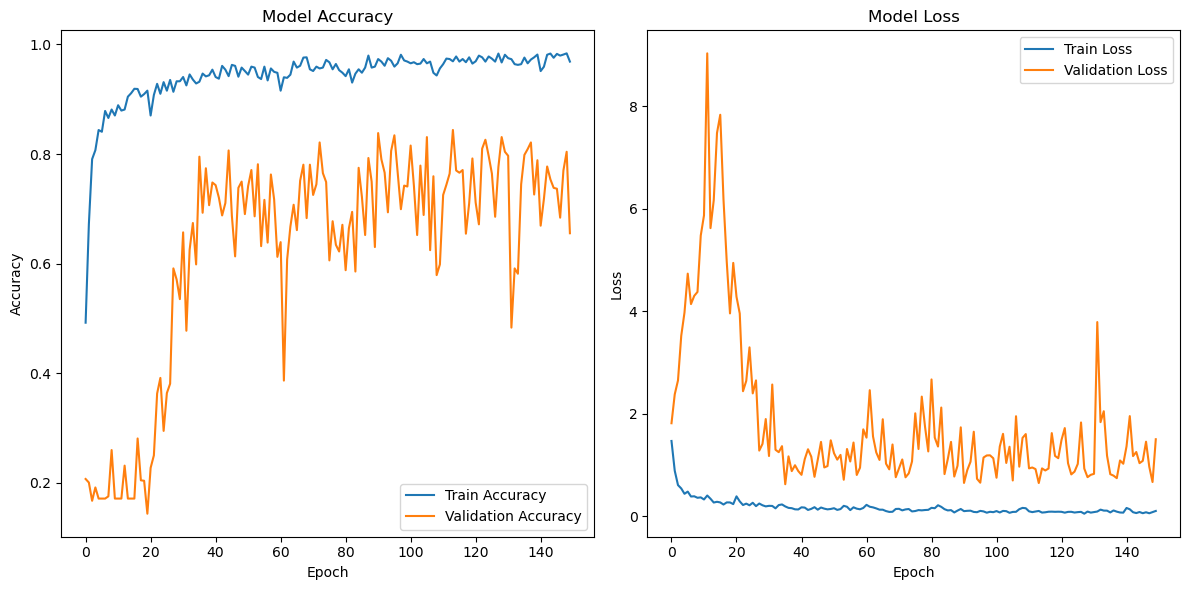

In [146]:
# Load the training history
with open('training_history_cnn_v4.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [147]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model4.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [148]:
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)

Classification Report:
                 precision    recall  f1-score   support

     FreshApple       0.99      0.71      0.83       200
    FreshBanana       0.78      0.90      0.84       210
FreshBellpepper       0.89      0.87      0.88       210
    FreshCarrot       0.94      0.99      0.96       209
     FreshMango       0.83      0.62      0.71       200
    FreshTomato       0.73      0.96      0.83       201

       accuracy                           0.84      1230
      macro avg       0.86      0.84      0.84      1230
   weighted avg       0.86      0.84      0.84      1230



## **5. Resultados**

### Graficas de Accuracy y Loss

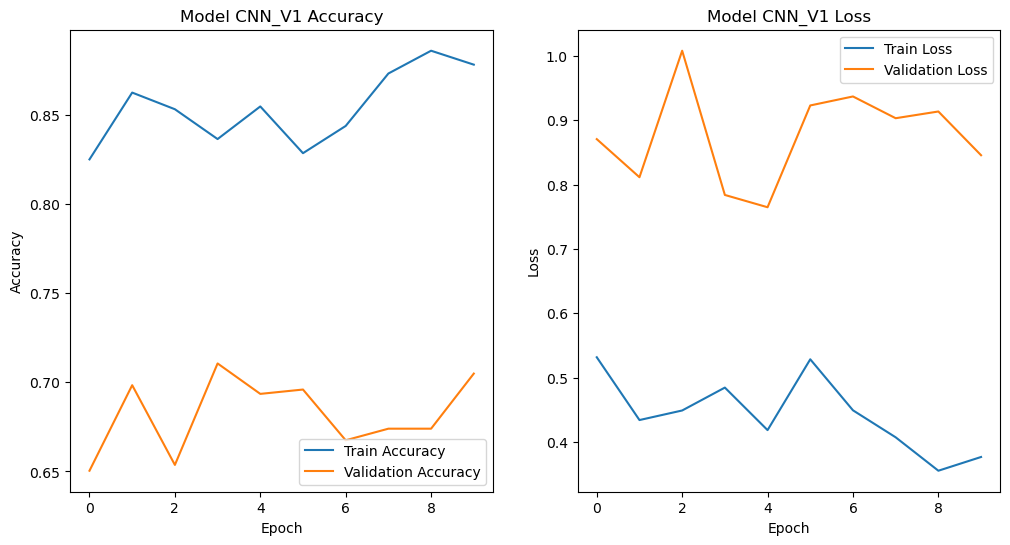

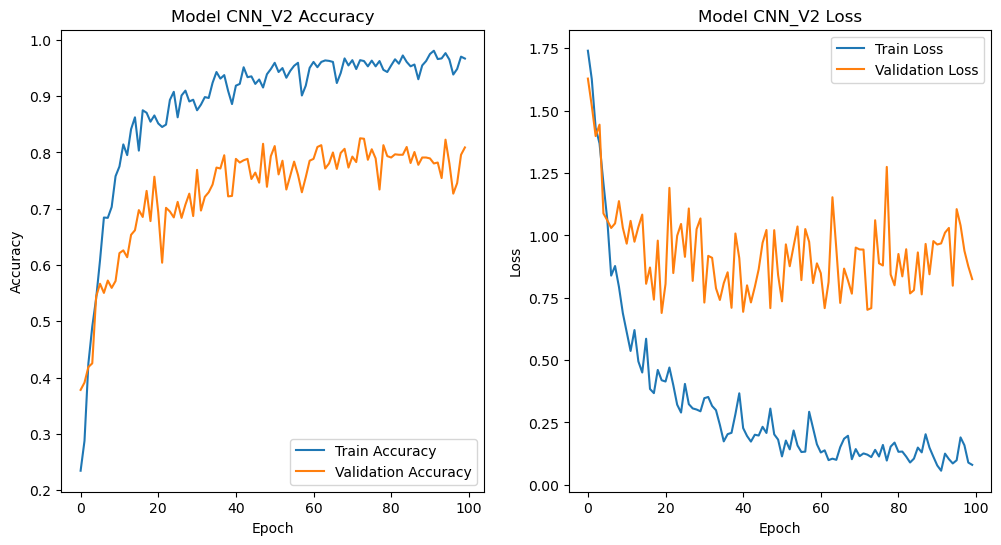

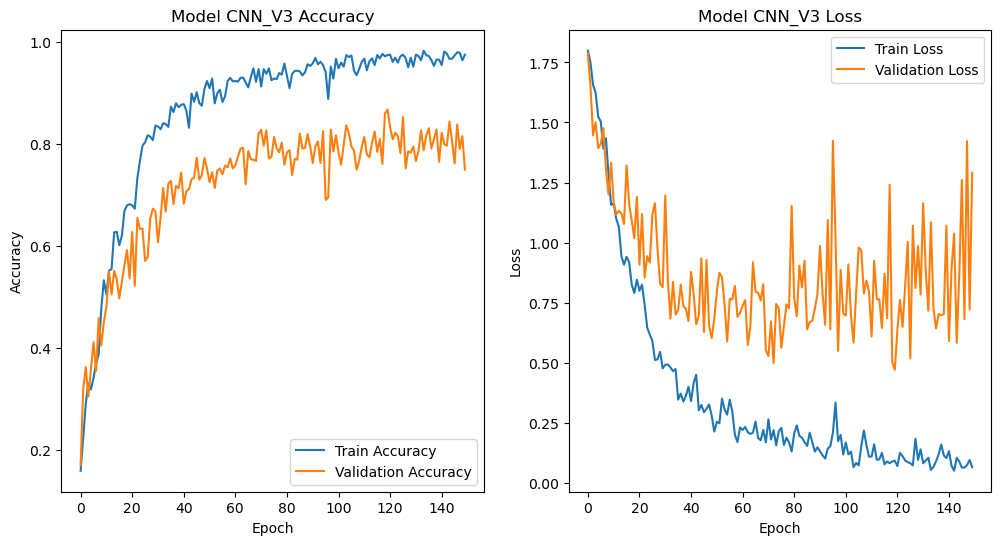

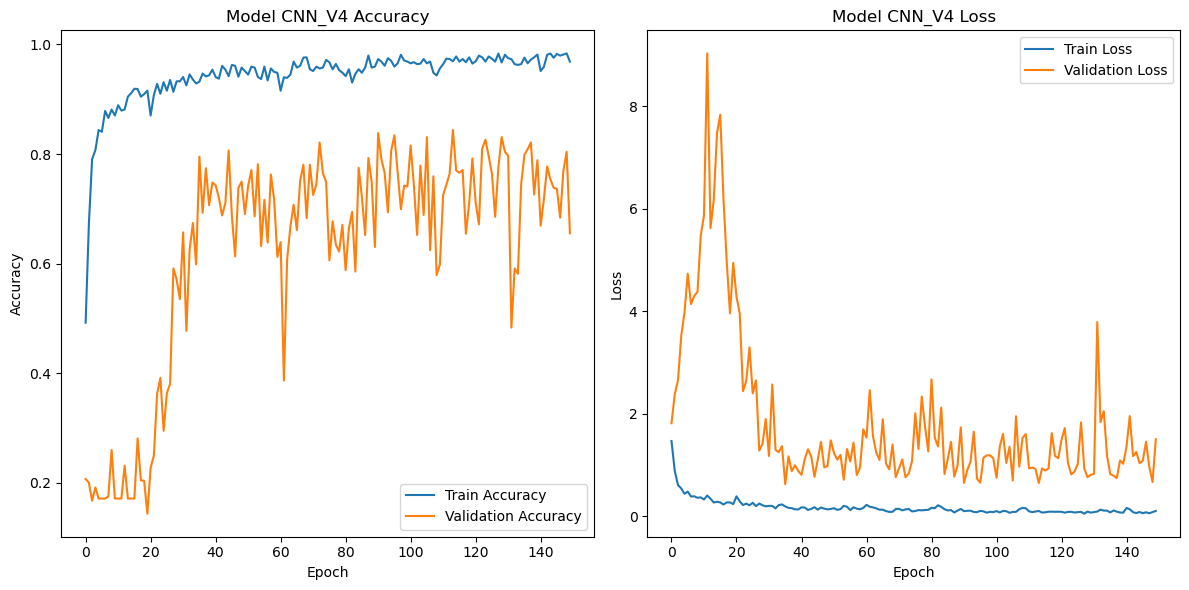

In [157]:
# Load the training history
with open('training_history_cnn_v1.pkl', 'rb') as f:
    history1 = pickle.load(f)

# Load the training history
with open('training_history_cnn_v2.pkl', 'rb') as f:
    history2 = pickle.load(f)

# Load the training history
with open('training_history_cnn_v3.pkl', 'rb') as f:
    history3 = pickle.load(f)

# Load the training history
with open('training_history_cnn_v4.pkl', 'rb') as f:
    history4 = pickle.load(f)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1['accuracy'], label='Train Accuracy')
plt.plot(history1['val_accuracy'], label='Validation Accuracy')
plt.title('Model CNN_V1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1['loss'], label='Train Loss')
plt.plot(history1['val_loss'], label='Validation Loss')
plt.title('Model CNN_V1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history2['accuracy'], label='Train Accuracy')
plt.plot(history2['val_accuracy'], label='Validation Accuracy')
plt.title('Model CNN_V2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2['loss'], label='Train Loss')
plt.plot(history2['val_loss'], label='Validation Loss')
plt.title('Model CNN_V2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history3['accuracy'], label='Train Accuracy')
plt.plot(history3['val_accuracy'], label='Validation Accuracy')
plt.title('Model CNN_V3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3['loss'], label='Train Loss')
plt.plot(history3['val_loss'], label='Validation Loss')
plt.title('Model CNN_V3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history4['accuracy'], label='Train Accuracy')
plt.plot(history4['val_accuracy'], label='Validation Accuracy')
plt.title('Model CNN_V4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4['loss'], label='Train Loss')
plt.plot(history4['val_loss'], label='Validation Loss')
plt.title('Model CNN_V4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
# Show the plots
plt.tight_layout()
plt.show()

    Vemos que el modelo 3 llega a ser mas certero y su perdida es menor

### Reporte de Clasificacion

In [159]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions1 = np.array([])
labels1 = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions1 = np.concatenate([predictions1, classes_x])
    labels1 = np.concatenate([labels1, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names1 = {v: k for k, v in test_data_flow.class_indices.items()}
 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

In [160]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions2 = np.array([])
labels2 = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model2.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions2 = np.concatenate([predictions2, classes_x])
    labels2 = np.concatenate([labels2, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names2 = {v: k for k, v in test_data_flow.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [161]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions3 = np.array([])
labels3 = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model3.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions3 = np.concatenate([predictions3, classes_x])
    labels3 = np.concatenate([labels3, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names3 = {v: k for k, v in test_data_flow.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [162]:
# Initialize empty numpy arrays to store predicted classes and true labels
predictions4 = np.array([])
labels4 = np.array([])

# Reset the test generator to start from the first batch
test_data_flow.reset()

# Iterate through the test generator
for i in range(len(test_data_flow)):
    # Get the input data (x) and true labels (y)
    x, y = test_data_flow[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model4.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions4 = np.concatenate([predictions4, classes_x])
    labels4 = np.concatenate([labels4, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names4 = {v: k for k, v in test_data_flow.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [165]:
label_names1 = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels1, predictions1, target_names=[label_names1[i] for i in sorted(label_names1.keys())])

print("Reporte de Clasificacion Modelo 1:")
print(class_report)

label_names2 = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels2, predictions2, target_names=[label_names2[i] for i in sorted(label_names2.keys())])

print("Reporte de Clasificacion Modelo 2:")
print(class_report)




Reporte de Clasificacion Modelo 1:
                 precision    recall  f1-score   support

     FreshApple       0.84      0.78      0.81       200
    FreshBanana       0.55      0.74      0.63       210
FreshBellpepper       0.86      0.84      0.85       210
    FreshCarrot       0.95      0.80      0.87       209
     FreshMango       0.65      0.51      0.57       200
    FreshTomato       0.74      0.81      0.77       201

       accuracy                           0.75      1230
      macro avg       0.76      0.75      0.75      1230
   weighted avg       0.76      0.75      0.75      1230

Reporte de Clasificacion Modelo 2:
                 precision    recall  f1-score   support

     FreshApple       0.83      0.67      0.74       200
    FreshBanana       0.65      0.91      0.76       210
FreshBellpepper       0.94      0.90      0.92       210
    FreshCarrot       0.90      0.95      0.93       209
     FreshMango       0.78      0.64      0.70       200
    FreshTomat

In [166]:
label_names3 = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels3, predictions3, target_names=[label_names3[i] for i in sorted(label_names3.keys())])

print("Reporte de Clasificacion Modelo 3:")
print(class_report)

label_names4 = {v: k for k, v in test_data_flow.class_indices.items()}

# Generate classification report
class_report = classification_report(labels4, predictions4, target_names=[label_names4[i] for i in sorted(label_names4.keys())])

print("Reporte de Clasificacion Modelo 4:")
print(class_report)

Reporte de Clasificacion Modelo 3:
                 precision    recall  f1-score   support

     FreshApple       0.91      0.81      0.86       200
    FreshBanana       0.71      0.92      0.80       210
FreshBellpepper       0.93      0.83      0.88       210
    FreshCarrot       0.95      0.99      0.97       209
     FreshMango       0.97      0.73      0.84       200
    FreshTomato       0.82      0.92      0.86       201

       accuracy                           0.87      1230
      macro avg       0.88      0.87      0.87      1230
   weighted avg       0.88      0.87      0.87      1230

Reporte de Clasificacion Modelo 4:
                 precision    recall  f1-score   support

     FreshApple       0.99      0.71      0.83       200
    FreshBanana       0.78      0.90      0.84       210
FreshBellpepper       0.89      0.87      0.88       210
    FreshCarrot       0.94      0.99      0.96       209
     FreshMango       0.83      0.62      0.71       200
    FreshTomat

    ## Vemos como aun cuando se agrego una capa mas de BachNormalization al modelo 4 esto genero menos precision en unas clases, por lo que el modelo 3 es el mas optimo 

## **6. Prueba y Validacion**

In [178]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
model_v = tf.keras.models.load_model(base_path+'best_model_cnn_v3.keras')

# Define paths to the images
image_paths = [
    base_path+'validation_set/FreshApple/1-1F49600N-D14_cleanup.png',
    base_path+'validation_set/FreshCarrot/51r231fx89L._AC_.jpg',
    base_path+'validation_set/FreshMango/91PD3DRbUaL._SL1500_.jpg'
]

# Define a function to get the true label from the image path
def get_true_label(img_path):
    return os.path.basename(os.path.dirname(img_path))

# Load and preprocess the images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image to 128x128
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Predict and get true labels
predictions = []
true_labels = []

for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)
    pred_prob = model_v.predict(img_array)
    pred_class = np.argmax(pred_prob, axis=1)[0]  # Get the predicted class index
    predictions.append(pred_class)
    true_labels.append(get_true_label(img_path))  # Extract true label from image path

# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_data_flow.class_indices.items()}

print("Results:")
for i, img_path in enumerate(image_paths):
    pred_label = label_names[predictions[i]]
    true_label = true_labels[i]
    print(f"Image: {img_path}")
    print(f"Predicted Class: {pred_label}")
    print(f"True Class: {true_label}  <---------")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Results:
Image: imagenes/produccion/validation_set/FreshApple/1-1F49600N-D14_cleanup.png
Predicted Class: FreshBellpepper
True Class: FreshApple  <---------

Image: imagenes/produccion/validation_set/FreshCarrot/51r231fx89L._AC_.jpg
Predicted Class: FreshCarrot
True Class: FreshCarrot  <---------

Image: imagenes/produccion/validation_set/FreshMango/91PD3DRbUaL._SL1500_.jpg
Predicted Class: FreshTomato
True Class: FreshMango  <---------

